# Energy AI Hackathon 2024: Team Entelligence
Authors:
- Atharva Kalamkar, Computational Engineering
- Mihir Yogesh Bendre, Computational Engineering
- Muhammad Muneeb Akmal, Petroleum and Geosystem Engineering
- Avya Kalra, Computational Engineering
- Muhammad Taha, Computational Engineering


**The University of Texas at Austin, Austin, Texas USA**

Executive Summary

1. What is the problem?
Predicting Average Pump Difference to optimize fluid system selection, minimizing uncertainty in post-simulation planning, scheduling, and budgeting.  
Utilization of accurate Data Analytic principle to evaluate Data sources with varying uncertain features. 
Feature Selection was  made difficult due to NaN & Hidden values adding to the complexity in Transforming features.
Developing Data-driven  Machine learning model to not only find missing data but to avoid uncertainty below 45 degree based of an accuracy plot

2. What did your team do to address the problem?
Cleaned data by removing Nan values and  Impute data by implementing KNNimputer.
Feature Selection ranking was obtain using Kendall Correlation Matrix (coverage).
Splitting Data in Training(80%) and Prediction(20%) datasets.
Grid Search Algorithm.

3. What did your team learn?
Our team learn not only principles of Data Analysis and ML but also the ability support members due to circumstances they encountered in their learning journey.

4. What does your team recommend going forward?
Create a plan of action and meet the agreed upon Target schedule.

Workflow goals
1. Finding most important features
2. Finding the Average pump difference using the most important features using machine learning for a Hacakathon dataset

Workflow Steps
1. Importing Libraries and Dataset: pandas, numpy, pickle, matplotlib, metrics.
2. Data Cleaning and Imputation: KNNImputer, Normalizing Data.
3. Feature Engineering/ Feature importance: Matrix Correlation/ Coverage.
4. Data Preprocessing: k-fold cross validation.
5. Trying various Machine learning models: Linear, Random Forest, DeepONet & SVR models.
6. Uncertainty realizations.


# 1. Importing Libraries and Dataset

In [2]:
#Importing required packages.
import pandas as pd
import numpy as np
import pickle
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from itertools import combinations
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# To get diferent metric scores
from sklearn.metrics import (
    accuracy_score,
)

In [3]:
#Importing the data
dataFile ='HackathonData2024.csv'
data = pd.read_csv(dataFile,index_col=0)
datacopy = data.copy()

# 2. Data Cleaning / Imputation
- Dropping N/A values for response variable
- Impute missing values
- Normalize data

In [4]:
# Assign a unique numerical label to each categorical variable using Label Encoder
le = LabelEncoder()

data['Area'] = le.fit_transform(data['Area'])
data['Fluid System'] = le.fit_transform(data['Fluid System'])
data['Development Strategy'] = le.fit_transform(data['Development Strategy'])
data['CODEV_POSITION'] = le.fit_transform(data['CODEV_POSITION'])
data['CODEV_FORMATION_POSITION'] = le.fit_transform(data['CODEV_FORMATION_POSITION'])

In [5]:
# Normalize data
scaler = MinMaxScaler()

# Fit and transform the entire DataFrame, store the untransformed solution before transforming everything
normalized_data = scaler.fit_transform(data)

# Convert the normalized data back to a DataFrame
data = pd.DataFrame(normalized_data, columns=data.columns)

In [6]:
# Pre imputed data
data.describe()

,Avg Pump Difference,Area,Lateral Length,Fluid System,TVD,Development Strategy,DELAYED,BOUND_CODE,CODEV_POSITION,CODEV_FORMATION_POSITION,...,CODEV_3000_AVG_TVD_DIST,CODEV_3000_AVG_WELL_AGE,CODEV_3000_MEDIAN_WELL_AGE,CODEV_3000_WELL_COUNT,Pressure Gradient (psi/ft) new,Soak Time,Avg Open Pressure,SD Open Pressure,Avg Close Pressure,SD Close Pressure
count,333.000000,348.000000,348.000000,348.000000,344.000000,348.000000,348.000000,348.000000,348.000000,348.000000,...,348.000000,348.000000,348.000000,348.000000,346.000000,348.000000,340.000000,340.000000,347.000000,347.000000
mean,0.270520,0.438314,0.554417,0.191571,0.521732,0.296935,0.718391,0.890362,0.356322,0.258621,...,0.163492,0.524477,0.476293,0.156797,0.433206,0.163941,0.569506,0.067593,0.620596,0.339374
std,0.187205,0.266272,0.151494,0.256243,0.256534,0.241308,0.450431,0.253291,0.479601,0.438507,...,0.190368,0.109122,0.103832,0.170641,0.177845,0.149723,0.206419,0.086427,0.209830,0.173070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.127357,0.233333,0.484277,0.000000,0.298799,0.000000,0.000000,0.900080,0.000000,0.000000,...,0.012813,0.510511,0.459184,0.043478,0.283805,0.041624,0.431488,0.029094,0.491351,0.213437
50%,0.231320,0.433333,0.503145,0.000000,0.470721,0.333333,1.000000,0.990989,0.000000,0.000000,...,0.110738,0.514264,0.464286,0.130435,0.420844,0.117677,0.554580,0.048461,0.642977,0.331107
75%,0.361831,0.666667,0.654088,0.333333,0.787913,0.500000,1.000000,0.999990,1.000000,1.000000,...,0.239780,0.537913,0.474490,0.217391,0.563634,0.230216,0.721580,0.074383,0.771903,0.441057
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Impute data using KNNImputer
response = 'Avg Pump Difference'

# Separate the features for imputation
features_for_imputation = data.drop(columns=[response])

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=3)

# Impute missing values for features
imputed_features = pd.DataFrame(imputer.fit_transform(features_for_imputation), columns=features_for_imputation.columns)

# Combine the imputed features with the response variable
data = pd.concat([imputed_features, data[response]], axis=1)

In [8]:
# Post imputed data
data.describe()

,Area,Lateral Length,Fluid System,TVD,Development Strategy,DELAYED,BOUND_CODE,CODEV_POSITION,CODEV_FORMATION_POSITION,PARENT_CODEV_1050_WELL_COUNT,...,CODEV_3000_AVG_WELL_AGE,CODEV_3000_MEDIAN_WELL_AGE,CODEV_3000_WELL_COUNT,Pressure Gradient (psi/ft) new,Soak Time,Avg Open Pressure,SD Open Pressure,Avg Close Pressure,SD Close Pressure,Avg Pump Difference
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,...,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,333.000000
mean,0.438314,0.554417,0.191571,0.525274,0.296935,0.718391,0.890362,0.356322,0.258621,0.292581,...,0.524477,0.476293,0.156797,0.433033,0.163941,0.571590,0.067080,0.620917,0.339512,0.270520
std,0.266272,0.151494,0.256243,0.257853,0.241308,0.450431,0.253291,0.479601,0.438507,0.187455,...,0.109122,0.103832,0.170641,0.177418,0.149723,0.206031,0.085526,0.209613,0.172839,0.187205
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233333,0.484277,0.000000,0.298799,0.000000,0.000000,0.900080,0.000000,0.000000,0.181818,...,0.510511,0.459184,0.043478,0.283853,0.041624,0.432361,0.029094,0.492576,0.213849,0.127357
50%,0.433333,0.503145,0.000000,0.472973,0.333333,1.000000,0.990989,0.000000,0.000000,0.272727,...,0.514264,0.464286,0.130435,0.420844,0.117677,0.557193,0.048461,0.644223,0.332104,0.231320
75%,0.666667,0.654088,0.333333,0.805180,0.500000,1.000000,0.999990,1.000000,1.000000,0.363636,...,0.537913,0.474490,0.217391,0.562829,0.230216,0.728315,0.073648,0.770585,0.440471,0.361831
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Store the dropped rows as solution before dropping
solution = data[data['Avg Pump Difference'].isna()].copy()

# Drop N/A values in avg pump difference
data.dropna(subset=['Avg Pump Difference'], inplace=True)

# 3. Data Overview

- Observations
- Sanity checks

In [10]:
# Check how the data looks like
data.head()

,Area,Lateral Length,Fluid System,TVD,Development Strategy,DELAYED,BOUND_CODE,CODEV_POSITION,CODEV_FORMATION_POSITION,PARENT_CODEV_1050_WELL_COUNT,...,CODEV_3000_AVG_WELL_AGE,CODEV_3000_MEDIAN_WELL_AGE,CODEV_3000_WELL_COUNT,Pressure Gradient (psi/ft) new,Soak Time,Avg Open Pressure,SD Open Pressure,Avg Close Pressure,SD Close Pressure,Avg Pump Difference
0,0.000000,0.503145,0.0,0.921922,0.000000,1.0,0.999000,0.0,0.0,0.181818,...,0.510511,0.459184,0.000000,0.759727,0.019527,0.842860,0.076784,0.799156,0.255725,0.090496
1,0.000000,0.503145,0.0,0.921922,0.000000,1.0,0.999000,0.0,0.0,0.181818,...,0.510511,0.459184,0.000000,0.777598,0.053443,0.841193,0.073942,0.884038,0.494275,0.032628
2,0.033333,0.547170,0.0,0.337838,0.500000,0.0,0.009001,1.0,0.0,0.545455,...,0.578078,0.459184,0.434783,0.343463,0.019527,0.541036,0.039102,0.353020,0.363723,0.164602
4,0.066667,0.000000,0.0,0.585586,0.333333,1.0,0.900089,0.0,0.0,0.363636,...,0.525526,0.469388,0.043478,0.270124,0.329908,0.799933,0.035019,0.732338,0.387087,0.251020
5,0.100000,0.628931,0.0,0.903904,0.000000,1.0,0.999900,0.0,0.0,0.000000,...,0.833333,0.750000,0.130435,0.605109,0.006166,0.648817,0.062230,0.539955,0.295108,0.064255


In [11]:
# Check data size
data.shape

(333, 40)

# 4. Feature Engineering / Parameter Importance

We use a Kendall correlation matrix as our rank-based correlation method since it is suitable for use with label-encoded categorical variables. It does not assume linearity and is generally less sensitive to outliers, so it is ideal for our case.

Top 4 Most Correlated with Avg Pump Difference:
Pressure Gradient (psi/ft) new    0.377964
Avg Open Pressure                 0.360776
Fluid System                      0.295313
Avg Close Pressure                0.273282
Name: Avg Pump Difference, dtype: float64


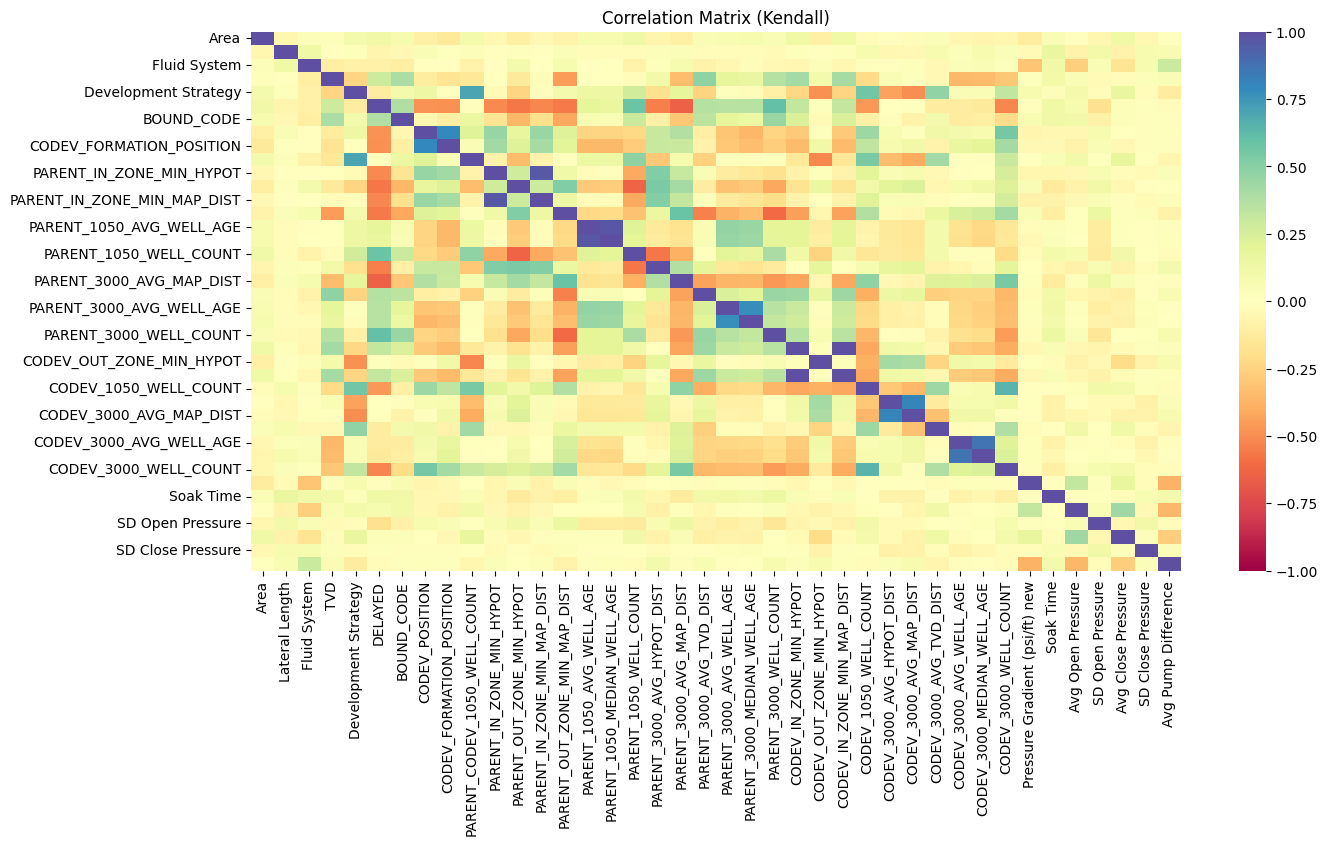

In [12]:
# Calculate Kendall correlation matrix
correlation_matrix = data.corr(method='kendall')

# Filter out the 'Avg Pump Difference' row
correlation_with_avg_diff = correlation_matrix.loc['Avg Pump Difference']

# Get the top 5 most correlated features
top_correlations = correlation_with_avg_diff.abs().sort_values(ascending=False)[1:5]

# Print the top 5 most correlated features
print(f'Top 4 Most Correlated with Avg Pump Difference:')
print(top_correlations)

# Plot the heatmap without numbers
plt.figure(figsize=(15, 7))
sns.heatmap(correlation_matrix, annot=False, vmin=-1, vmax=1, cmap="Spectral")
plt.title('Correlation Matrix (Kendall)')
plt.show()

From this we can pick the top 4 highest correleation factors, as they seem to be the most important parameters when influencing the response variable.

In [13]:
# Create X and y variables
X = data[top_correlations.index]
y = data['Avg Pump Difference']

# 5. Data Preprocessing

* Dataset split into two: Training dataset & Prediction dataset
* 80% of them are used fro training the ML model, 20% are used for prediction to check ML performance
* Training data is split into 5 for K-fold cross-validation

In [14]:
# Split the data into 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
# Use kfold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# 6. Machine Leaning Models
- Trying out Linear, Random Forest and SVR models
- Using different combinations of the four highest features to figure out the best model

In [16]:
# Define a function to create combinations of features
def get_feature_combinations(features):
    all_combinations = []
    for r in range(1, len(features) + 1):
        all_combinations.extend(combinations(features, r))
    return all_combinations

In [17]:
# Define the regression models and their respective parameter grids
models = {
    'lr': (LinearRegression(), {}),
    'rf': (RandomForestRegressor(), {'rf__n_estimators': [50, 100, 200]}),
    'svr': (SVR(), {'svr__kernel': ['linear', 'rbf'], 'svr__C': [1, 10, 100]})
}

# Initialize variables to track the best model and its RMSE
best_model = None
best_rmse = float('inf')
best_params = None
best_num_features = None
best_feature_names = None

# Iterate over models
for model_name, (model, param_grid) in models.items():
    # Iterate over all combinations of the 4 features
    for num_features in range(1, 5):
        feature_combinations = combinations(X_train.columns, num_features)
        
        for features in feature_combinations:
            # Create a pipeline with the model
            pipe = Pipeline([(model_name, model)])
            
            # GridSearchCV for hyperparameter tuning
            gcv = GridSearchCV(pipe, param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
            
            # Fit the model on the current feature combination
            gcv.fit(X_train[list(features)], y_train)
            
            # Get the best model from the grid search
            current_best_model = gcv.best_estimator_
            
            # Predict on the validation set
            y_pred_val = current_best_model.predict(X_test[list(features)])
            
            # Calculate RMSE for the current model
            rmse = mean_squared_error(y_test, y_pred_val, squared=False)
            
            # Update the overall best model if the current best model performs better
            if rmse < best_rmse:
                best_rmse = rmse
                best_model = current_best_model
                best_params = gcv.best_params_
                best_num_features = num_features
                best_feature_names = features
        
            # Print the results for the current best model and feature combination
            print(f'Model: {type(current_best_model.named_steps[model_name]).__name__}, Num Features: {num_features}, Features: {features}, RMSE: {rmse}, Params: {gcv.best_params_}')

# Print the overall best model, its RMSE, parameters, number of features, and feature names
print(f'Overall Best Model: {type(best_model.named_steps[model_name]).__name__}, Overall Best RMSE: {best_rmse}, Best Params: {best_params}, Num Features: {best_num_features}, Best Feature Names: {best_feature_names}')

Model: LinearRegression, Num Features: 1, Features: ('Pressure Gradient (psi/ft) new',), RMSE: 0.14826716627026415, Params: {}
Model: LinearRegression, Num Features: 1, Features: ('Avg Open Pressure',), RMSE: 0.1520655226127826, Params: {}
Model: LinearRegression, Num Features: 1, Features: ('Fluid System',), RMSE: 0.19168155085712243, Params: {}
Model: LinearRegression, Num Features: 1, Features: ('Avg Close Pressure',), RMSE: 0.16812388541990164, Params: {}
Model: LinearRegression, Num Features: 2, Features: ('Pressure Gradient (psi/ft) new', 'Avg Open Pressure'), RMSE: 0.13643332456576326, Params: {}
Model: LinearRegression, Num Features: 2, Features: ('Pressure Gradient (psi/ft) new', 'Fluid System'), RMSE: 0.1604994680358106, Params: {}
Model: LinearRegression, Num Features: 2, Features: ('Pressure Gradient (psi/ft) new', 'Avg Close Pressure'), RMSE: 0.13969931786410092, Params: {}
Model: LinearRegression, Num Features: 2, Features: ('Avg Open Pressure', 'Fluid System'), RMSE: 0.1

In [18]:
# Use the best model to predict 'Avg Pump Difference' for dropped rows
predicted_avg_pump_diff = best_model.predict(solution[['Pressure Gradient (psi/ft) new', 'Avg Open Pressure', 'Fluid System', 'Avg Close Pressure']])

# Inverse transform all the data
column_to_transform = datacopy['Avg Pump Difference'].values.reshape(-1, 1)
scaled_column = scaler.fit_transform(column_to_transform)
sol = scaler.inverse_transform(predicted_avg_pump_diff.reshape(1,-1)).flatten()

In [19]:
solutioncsv = pd.read_csv('solution.csv')
solutioncsv['Est Pump Difference, GPM'] = sol

In [20]:
bootstrap_model = pd.DataFrame()

# Perform bootstrap sampling
for i in range(100):
    # Sample with replacement from the original data
    df = pd.DataFrame(solution[['Pressure Gradient (psi/ft) new', 'Avg Open Pressure', 'Fluid System', 'Avg Close Pressure']])
    bootstrap_sample = pd.DataFrame(best_model.predict(df.sample(n=len(solutioncsv), replace=True)))
    
    # Reset the index to avoid duplicate labels
    bootstrap_sample.reset_index(drop=True, inplace=True)
    
    # Add the sampled column to the bootstrap model
    column_name = f'R{i+1}, GPM'
    bootstrap_model[column_name] = bootstrap_sample


In [21]:
bootstrap_model

,"R1, GPM","R2, GPM","R3, GPM","R4, GPM","R5, GPM","R6, GPM","R7, GPM","R8, GPM","R9, GPM","R10, GPM",...,"R91, GPM","R92, GPM","R93, GPM","R94, GPM","R95, GPM","R96, GPM","R97, GPM","R98, GPM","R99, GPM","R100, GPM"
0,0.358527,0.103445,0.536909,0.103445,0.528440,0.124776,0.172403,0.176905,0.118777,0.176905,...,0.328749,0.145424,0.185384,0.536909,0.145424,0.118777,0.176905,0.358527,0.124776,0.528440
1,0.176905,0.172403,0.414066,0.103445,0.110576,0.358527,0.272885,0.222379,0.414066,0.185384,...,0.103445,0.358527,0.118777,0.172403,0.172403,0.414066,0.110576,0.118777,0.414066,0.414066
2,0.536909,0.118777,0.118777,0.528440,0.414066,0.176905,0.222379,0.103445,0.145424,0.222379,...,0.272885,0.172403,0.145424,0.222379,0.185384,0.222379,0.176905,0.176905,0.118777,0.124776
3,0.222379,0.118777,0.528440,0.328749,0.528440,0.103445,0.118777,0.536909,0.272885,0.118777,...,0.185384,0.328749,0.145424,0.103445,0.536909,0.118777,0.328749,0.172403,0.118777,0.172403
4,0.536909,0.103445,0.272885,0.414066,0.358527,0.328749,0.272885,0.124776,0.110576,0.536909,...,0.528440,0.103445,0.414066,0.103445,0.110576,0.272885,0.222379,0.222379,0.328749,0.172403
5,0.185384,0.358527,0.118777,0.145424,0.172403,0.328749,0.222379,0.358527,0.414066,0.222379,...,0.528440,0.172403,0.118777,0.145424,0.110576,0.358527,0.185384,0.272885,0.124776,0.414066
6,0.118777,0.358527,0.222379,0.358527,0.328749,0.110576,0.536909,0.414066,0.103445,0.528440,...,0.185384,0.185384,0.328749,0.536909,0.172403,0.176905,0.176905,0.358527,0.118777,0.358527
7,0.172403,0.145424,0.536909,0.124776,0.328749,0.110576,0.536909,0.145424,0.110576,0.118777,...,0.328749,0.176905,0.358527,0.145424,0.176905,0.124776,0.176905,0.358527,0.414066,0.536909
8,0.176905,0.145424,0.110576,0.536909,0.528440,0.358527,0.222379,0.414066,0.124776,0.176905,...,0.414066,0.118777,0.272885,0.528440,0.172403,0.124776,0.118777,0.103445,0.118777,0.110576
9,0.414066,0.272885,0.103445,0.103445,0.536909,0.528440,0.222379,0.358527,0.358527,0.222379,...,0.528440,0.414066,0.222379,0.103445,0.222379,0.536909,0.536909,0.124776,0.328749,0.110576


In [22]:
for i in range(1, 101):
    column_name = f'R{i}, GPM'
    solutioncsv[column_name] = bootstrap_model[column_name]

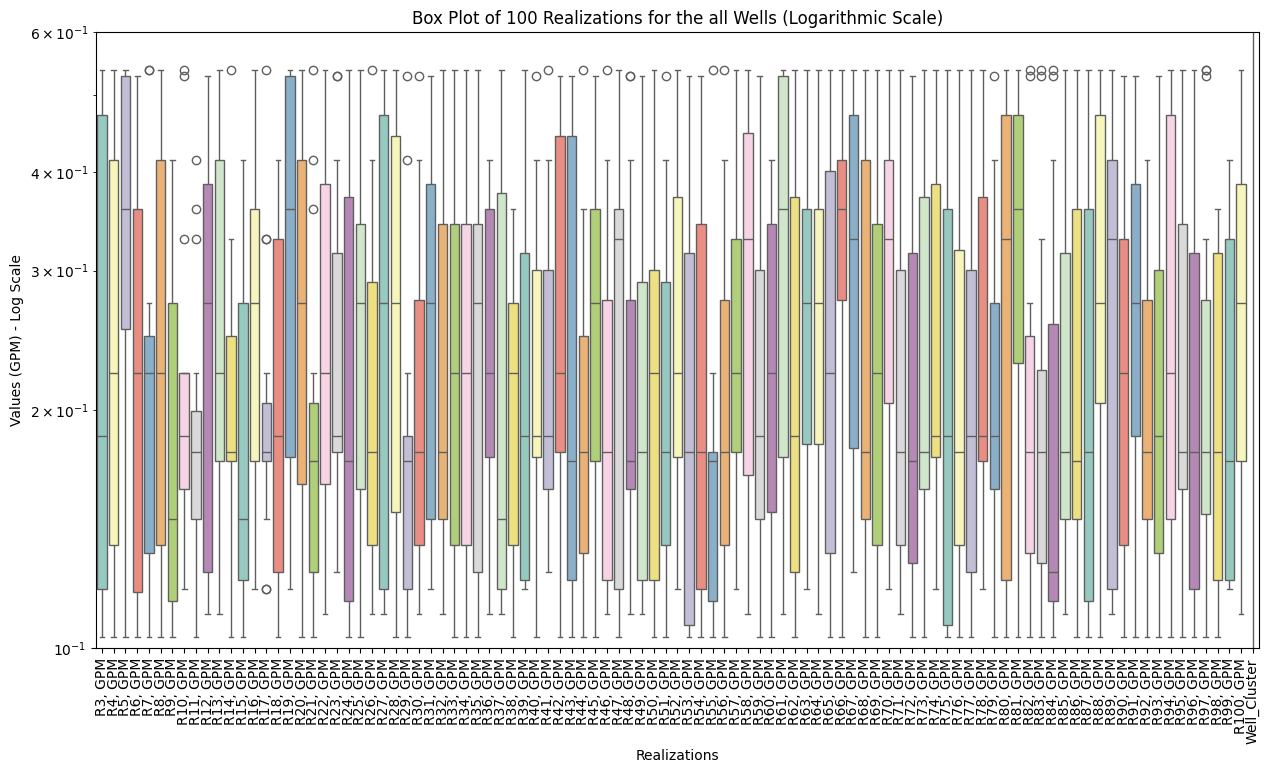

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting a subset of wells for visualization
# For demonstration, we'll take the first 10 wells
subset_wells = bootstrap_model.iloc[:, 2:] # Excluding Well_ID and Est Pump Difference

# Approach 1: Logarithmic Scale
plt.figure(figsize=(15, 8))
sns.boxplot(data=subset_wells, palette="Set3")
plt.yscale('log')
plt.title("Box Plot of 100 Realizations for all the Wells (Logarithmic Scale)")
plt.xlabel("Realizations")
plt.ylabel("Values (GPM) - Log Scale")
plt.ylim(0.1, 0.6)
plt.xticks(rotation=90)
plt.show()


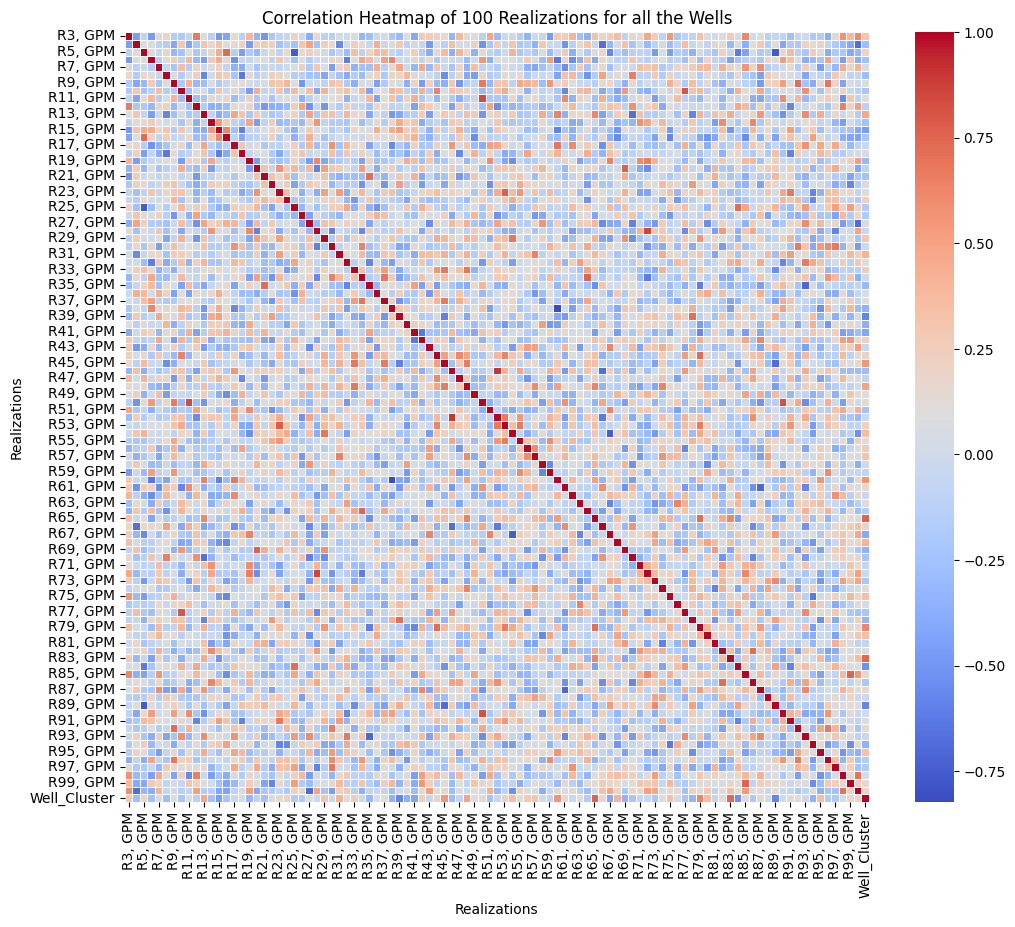

In [37]:
# Creating a correlation heatmap for the realizations of all wells

# Calculating the correlation matrix
correlation_matrix = subset_wells.corr()

# Creating the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap of 100 Realizations for all the Wells")
plt.xlabel("Realizations")
plt.ylabel("Realizations")
plt.show()
